# INFO 2950 Group Project Phase 4

Name: Hedy Song ys565, Nichole Zheng nz268

## Table of Contents:
1. [Introduction](#introduction)
    - [Background Information and Context](#background)
    - [Key Terms and Data Sources](#key)
    - [Research Questions](#researchquestions)
    - [Summary of Findings](#overview)
2. [Data Description](#description)
    - [Purpose and Origin](#PurposeandOrigin)
    - [Composition of the Dataset](#CompositionoftheDataset)
    - [Data Collection](#DataCollection)
    - [Preprocessing and Cleaning](#PreprocessingandCleaning)
    - [Potential Uses](#PotentialUses)
3. [Data Cleaning](#cleaning)
    - [Summary](#summary)
    - [Additional Preparation](#preparation)
4. [Question 1](#Q1)
    - [Linear Regression](#lin01)
    - [Check Multilinearity](#multi01)
    - [Check Assumptions](#check01)
5. [Question 2](#Q2)
    - [Linear Regression](#lin02)
    - [Check Multilinearity](#multi02)
    - [Check Assumptions](#check02)
6. [Limitations](#limitation)
7. [Conclusion](#conclusion)
8. [References](#reference)

## Introduction <a name="introduction"></a>
_______
### Background Information and Context  <a name= "background"></a>

The dataset we are using was originally created to track and analyze daily trends in YouTube’s most popular videos across multiple countries from 2017–2018. It contains detailed metadata for each video that appeared on the platform’s “Trending” list, including the video title, channel name, publication time, category tags, view counts, likes, dislikes, comment counts, and descriptions. The dataset spans several regions—including the United States, United Kingdom, etc. —with each country’s data stored in a separate CSV file, along with accompanying JSON files that map category IDs to their corresponding video categories.

YouTube is one of the largest global platforms for video consumption, influencing everything from entertainment and pop culture to news and public opinion. With more than 2.5 billion monthly active users and millions of videos uploaded each day, understanding what drives a video to become “trending” has become increasingly important ([Singh](https://www.demandsage.com/youtube-stats/#:~:text=YouTube%20Monthly%20Active%20Users,around%202.5%20billion%20active%20users.), 2025). Because nearly 70% of watch time is driven by algorithmic recommendations rather than direct searches, visibility on the platform is highly shaped by engagement metrics and external social patterns (<a href = https://sqmagazine.co.uk/social-media-algorithm-impact-statistics/>SQ Magazine</a>, 2025). Prior research supports this: Borghol et al. (2013) demonstrate that non-content features such as uploader history and channel reach strongly influence video popularity. Cunningham et al. (2017) further show that videos are more likely to show up in search results when their titles include relevant keywords. Together, these findings highlight how trending status emerges from a combination of audience behavior, content strategies, and platform-driven dynamics, emphasizing the need to analyze these factors across different cultural and regional contexts. An understanding of these drivers is essential for creators, marketers, and platform designers aiming to maximize audience engagement on a global scale.

The dataset used in this project is publicly available on Kaggle and can be freely downloaded. It was originally compiled using the YouTube Data API, which aggregates daily snapshots of trending videos across nations. The data is provided in CSV format, making it accessible for large-scale analysis and comparison.

The goal of this project is to explore what factors predict whether a YouTube video becomes trending in the United States versus the United Kingdom. To drive this analysis, we examine the relationship between title capitalization and trending duration in both regions. Further, inspired by Cunningham’s work on keyword relevance, this report investigates the role of different types of keywords—including emotional, trending, and search-driven keywords—in influencing whether videos gain visibility. By comparing engagement metrics and metadata patterns across these two regions, we aim to identify the characteristics that most strongly predict trending status. These insights can help content creators and marketers better understand regional audience preferences and refine their strategies to increase visibility and impact on the platform.

**Keywords:** YouTube analytics, trending prediction, video metadata, engagement metrics, title keywords, machine learning, cross-regional comparison

_______
### Key Terms and Data Sources <a name= "key"></a>

Our dataset is sourced from Kaggle: [Trending YouTube Video Statistics Dataset](https://www.kaggle.com/datasets).

#### Key Terms

**Linear regression** – A statistical model trained on known data that models the relationship of a dependent variable based on one or more independent variables.  


**Dummy variables** – A variable that takes only the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.  


**Log transformation** – A mathematical transformation that applies the natural logarithm to a variable, often used to reduce skewness and stabilize variance in highly skewed data (e.g., view counts or likes).  


**Bootstrapping** – A method of inferring results for a population from results found on a collection of smaller random samples of that population, using replacement during the sampling process.  


**Emotional keywords** – Words in video titles that convey strong emotions or reactions (e.g., “insane,” “unbelievable,” “crazy,” “fails,” “wins,” “shocking,” “truth,” “lie”). These are hypothesized to increase viewer engagement. High-arousal emotional terms are especially effective at capturing interest ([IgniteFlow](https://igniteflow.com/crafting-high-converting-titles-with-psychology/)). These words were chosen because they maximize emotional arousal, are memorable, and have been empirically associated with higher engagement on platforms like YouTube.  


**Trending keywords** – Words associated with viral content or popular topics during 2017–2018 (e.g., “fidget spinner,” “bitcoin,” “challenge,” “slime,” “prank,” “reaction”). These keywords were chosen based on the trend report of <a href = https://trends.withgoogle.com/year-in-search/2017/>Google</a>, where random keywords were picked from relevant categories.  


**Search-driven keywords** – Words and phrases designed to capture search intent (e.g., “how to,” “best way to,” “top 10,” “ultimate guide,” “explained,” “tips,” “tutorial”), which may enhance discoverability and visibility. These keywords are chosen because they optimize for discoverability. 

#### Attributes used in analysis:

- **video_id** – Unique identifier for each YouTube video
- **trending_date** – Date when the video appeared on the trending list (YYYY-MM-DD format)
- **title** – Title of the YouTube video
- **channel_title** – Name of the channel that uploaded the video
- **category_id** – Numeric ID representing the video’s category (e.g., entertainment, music, news)
- **publish_time** – Exact timestamp when the video was originally published on YouTube (UTC)
- **tags** – List of keywords or tags associated with the video
- **views** – Total number of views the video had when it was trending
- **likes** – Number of likes the video received
- **dislikes** – Number of dislikes the video received
- **comment_count** – Number of comments posted on the video
- **category_name** – Name of the video’s category (e.g., entertainment, music, news)
- **Num_tags** – Number of tags associated with the video
- **country** – Indicates whether the video is from the US or UK
- **total_trending_days** – Total number of times the video appears in the trending dataset
- **Num_words_title** – Number of words in the video title
- **Capitalized_words_title** – Number of fully capitalized words in the title
- **country_dummy** – 0 for US and 1 for UK
- **cap_x_country** – Interaction term between number of capitalized words and country; captures how the effect of title capitalization on trending duration differs in the UK    

_______
### Research Questions <a name= "researchquestions"></a>

**Main question:**
How do linguistic features in YouTube titles and tags influence its duration on the trending list for the time period 2017–2018 in the United States and the United Kingdom?

In order to answer this research question, the following subquestions are proposed: 
1. How does the use of capitalization in video titles affect trending duration, and does this effect differ between the United States and the United Kingdom?
2. How do emotionally charged keywords in video titles (e.g., emotional_keywords, search_keywords, trend_2017_2018_keywords) influence trending duration, and does the strength of this effect differ between the United States and the United Kingdom?

_______
### Summary of Findings <a name= "overview"></a>

1. Capitalization Effects Differ Across Countries (Hypothesis 1)

Capitalization has a small but statistically significant positive association with trending duration overall (β = 0.0087, p < 0.001). However, the strong negative interaction term (β = –0.0328, p < 0.001) indicates that UK audiences respond less favorably to heavily capitalized titles than US. audiences. While US videos tend to gain slightly more visibility from additional capitalized words, this effect weakens—or reverses—in the UK. This supports our hypothesis that linguistic formatting cues are interpreted differently across cultural contexts. However, even though capitalization is significant, the assumption checks indicate heteroskedasticity, which implies the linear regression does not fully capture the relationship.

2. Keyword Categories Influence Trending Duration (Hypothesis 2)

Keyword categories show mixed effects:
- Emotional keywords (e.g., shocking, heartbreaking, hilarious) are associated with a decrease in trending duration (β = –0.0732, p = 0.003), suggesting that emotionally charged titles may oversaturate user attention or signal clickbait.
- Search-oriented keywords (e.g., how to, tutorial, review) also correlate negatively with trending duration (β = –0.2110, p < 0.001), meaning that informational content may attract sustained search traffic but not widespread trending engagement.
- 2017–2018 trending-topic keywords (e.g., Fortnite, Logan Paul, royal wedding) significantly increase trending duration (β = 0.1524, p < 0.001), confirming that time-specific cultural phenomena strongly drive virality.

Additionally, the interaction term for trending-topic keywords and country (β = –0.3281, p < 0.001) shows that U.K. trending behavior aligns less with globally viral topics than U.S. users, again pointing to meaningful cultural variation. Because trending behavior and keyword categories naturally involve substantial variability, we should interpret these results with caution. The model does not capture the full complexity of factors that drive YouTube trending performance, so our conclusions reflect only part of a much broader influence landscape.

3. No Multicollinearity Issues Detected

VIF values (all between 1.2 and 2.3) indicate that predictors—including interaction terms—are not strongly correlated with one another. This means the model estimates are stable, reliable, and interpretable.

Taken together, our findings show that title formatting and keyword content do influence trending duration, but the effects are nuanced and strongly shaped by cultural context. Capitalization benefits US videos more than UK videos, emotionally charged or instructional titles tend to shorten trending duration, and videos tied to major cultural events tend to trend longer—especially in the US.

These results highlight that creators and marketers should not assume that the same linguistic strategies perform equally well in different regions. Instead, audience-specific optimization—particularly in title design—appears essential for maximizing visibility on YouTube’s trending lists.

## Data Description <a name="description"></a>
_______
### Purpose and Origin <a name = "PurposeandOrigin"></a>

#### **For what purpose was the dataset created?**
The dataset was created to track and analyze daily trends of YouTube’s most popular videos across countries, including the United States, United Kingdom, and Japan, during 2017–2018. It aims to help researchers, content creators, and marketers understand factors influencing a video’s trending status.

#### **Who created the dataset?**
According to the Kaggle page, the dataset was created and curated by **Mitchell J.** There is no information about an affiliated team, company, or institution.

#### **Who funded the dataset?**
No funding information is provided.

---

### Composition of the Dataset <a name = "CompositionoftheDataset"></a>

#### **What do the instances represent?**
Each instance represents a single YouTube video that appeared on a country’s *Trending* list for a specific day between 2017 and 2018.

#### **How many instances are there?**
- **US dataset:** 40,949 trending videos  
- **UK dataset:** 38,916 trending videos  
- **Combined dataset (after cleaning):** 79,865 trending videos

#### **Does the dataset contain all possible instances?**
Yes. It includes all videos that appeared on the Trending list for the selected countries during 2017–2018.

#### **What does each instance consist of?**
Metadata for each video, including:  
- video title  
- channel name  
- publish time  
- category ID  
- tags  
- views, likes, dislikes, comment count  
- description  

Category IDs are mapped to names using a JSON file.

#### **Is there a target label?**
No explicit target label. Trending status is inherent because all videos included were trending.

#### **Missing information**
Some descriptions are missing; these were handled during preprocessing.

#### **Are relationships between instances explicit?**
No. There are no links to related videos or user interactions.

#### **Recommended splits**
None provided.

#### **Errors or noise**
Minor inconsistencies due to API scraping; e.g., videos later removed.

#### **Self-contained?**
Yes. No external dependencies.

#### **Confidential or sensitive data?**
No. All metadata is public and non-personal.

#### **Potentially offensive content?**
No.

#### **Relation to people**
Indirect—via aggregated engagement metrics—but no individual identities.

---

### Data Collection <a name = "DataCollection"></a>

#### **How was the data collected?**
Via the **YouTube Data API (v3)**, which provides daily snapshots of trending videos.

#### **Who collected the data?**
The dataset was compiled programmatically; no human subjects involved.

#### **Timeframe**
Trending videos from **2017–2018**.

---

### Preprocessing and Cleaning <a name = "PreprocessingandCleaning"></a>

#### **Was preprocessing done?**
The dataset creator does not specify preprocessing.  

#### **Was raw data saved?**
Yes. CSV and JSON files represent raw API outputs.

#### **Is preprocessing software available?**
None provided by the creator.  
Project preprocessing was done using **Python** + **Jupyter Notebooks**.

---

### Potential Uses <a name = "PotentialUses"></a>

#### **Has the dataset been used already?**
Yes, for:
- Exploratory analysis  
- Predictive modeling  
- Studying video popularity patterns  

#### **Repository of prior work**
Kaggle links community projects that use the dataset.

#### **Other possible uses**
- Modeling video virality  
- Analyzing regional popularity differences  
- Studying engagement patterns (views, likes, comments)

#### **Tasks the dataset should not be used for**
- Inferring trends about *all* YouTube videos (only trending ones included)  
- Identifying individual users or private information  


## Data Cleaning <a name="cleaning"></a>

### Summary <a name="summary"></a>


**Note:** 

- Both datasets have the same cleaning process to ensure consistency. 
- This section is just a summary. Our full data cleaning details can be found under the file 'Appendix.ipynb' in our  <a href =  https://github.com/yijin122/info2950_group_project/blob/main/Appendix.ipynb > GitHub</a>.


1. Remove Duplicates, Missing Values, and Invalid Entries

    - No duplicate rows found.

    - Rows with missing values in essential numeric columns (views, likes, dislikes, comment_count) were removed.

    - Invalid or corrupted entries were also excluded.

2. Drop Unnecessary Columns

    - Removed columns that were not relevant to the analysis, such as channel titles or descriptions, to focus on key variables (e.g., title, tags).

3. Convert Dates

    - `trending_date` and `publish_time` were converted to standard datetime format (YYYY-MM-DD).

4. Map Category IDs to Category Names

    - Merged the dataset with a category JSON file to replace numerical `category_id` with descriptive category names.

5. Clean Tags & Count Number of Tags

    - Cleaned the tags field by removing formatting characters and representing missing tags consistently.

    - Added a new column with the number of tags per video, supporting insights into categorization and searchability.

6. Drop Non-Useful Columns

    - Removed `comments_disabled`, `ratings_disabled`, and `video_error_or_removed` because they were not used in the analysis.

7. Quality Check

    - Used `df.info()` to verify column types and ensure all transformations were correct.


### Additional Preparation <a name="preparation"></a>

Before conducting our analysis, we performed several preprocessing steps to clean, restructure, and enrich the YouTube trending datasets:

1. Added a country identifier (e.g., "US" or "UK") to each dataset to distinguish observations. After labeling them, merged the two datasets into a single combined dataset to enable cross-country comparison.

2. Created a new variable `total_trending_days`, computed by counting the number of times each unique video (identified by title or video_id) appeared on the trending list. This aggregates scattered daily records into a meaningful indicator of longevity on the platform.

3. Constructed text-based variables to study how title presentation might relate to trending performance:
- `Num_words_title` — the total number of words in each video title.
- `Capitalized_words_title` — the number of words in the title that appear in all capital letters, capturing emphasis and stylistic choices.

These preparation steps ensured that our dataset was clean, consistent, and included the linguistic and popularity measures required for our analyses.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import re

In [2]:
# Load datasets
df_US = pd.read_csv("cleaned_USvideos_all.csv", encoding='utf-8')
df_UK = pd.read_csv("cleaned_UKvideos_all.csv", encoding='utf-8')

# Add country identifier
df_US['country'] = 'US'
df_UK['country'] = 'UK'

# Combine datasets
df_combined = pd.concat([df_US, df_UK], ignore_index=True)

print(f"US videos: {len(df_US)}")
print(f"UK videos: {len(df_UK)}")
print(f"Combined: {len(df_combined)}")

US videos: 40949
UK videos: 38916
Combined: 79865


In [3]:
df_combined['total_trending_days'] = df_combined.groupby('title')['title'].transform('count')
df_combined['Num_words_title'] = df_combined['title'].apply(lambda x: len(str(x).split()))

# Count number of fully capitalized words (e.g., 'NEW', 'OMG')
df_combined['Capitalized_words_title'] = df_combined['title'].apply(
    lambda x: len(re.findall(r'\b[A-Z]{2,}\b', str(x)))
)

# Quick check
df_combined[['title', 'total_trending_days','Num_words_title', 'Capitalized_words_title']].head()

,title,total_trending_days,Num_words_title,Capitalized_words_title
0,WE WANT TO TALK ABOUT OUR MARRIAGE,7,7,7
1,The Trump Presidency: Last Week Tonight with J...,7,10,1
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",7,10,0
3,Nickelback Lyrics: Real or Fake?,7,5,0
4,I Dare You: GOING BALD!?,6,5,2


## Question 1: <a name="Q1"></a>

**<u>How does the use of capitalization in video titles affect trending duration, and does this effect differ between the United States and the United Kingdom?</u>**

**Hypothesis:** The effect of capitalization on trending duration will differ across regions, reflecting underlying cultural differences in how U.S. and U.K. audiences respond to title formatting.

#### Linear Regression <a name="lin01"></a>

To formally test whether capitalization has different effects in the United States versus the United Kingdom, the categorical variable `country` was converted into a binary dummy variable.
- 0 = United States
- 1 = United Kingdom

This transformation allows us to include “country” directly in a linear regression model.

-------
Next, we generated an interaction term by multiplying the number of capitalized words in the title by the country dummy; this term captures whether capitalization has a different effect in the UK compared to the US. 

$$
\text{total\_trending\_days} = \beta_0 + \beta_1(\text{Capitalized\_words\_title}) + \beta_2(\text{country\_dummy}) + \beta_3(\text{cap} \times \text{country\_dummy}) + \varepsilon
$$

The interaction term $(\text{cap} \times \text{country\_dummy})$ will test whether capitalization impacts trending duration differently across countries.  

Meanwhile, $\beta_1$ represents the effect of capitalization in the US because all other terms go away when the $\text{country\_dummy}$ is 0, whereas $\beta_1 +\beta_3 $ represents the effect of capitalization in the UK since $\text{country\_dummy}$ is 1.


In [4]:
# Create country dummy variable (1 for UK, 0 for US)
df_combined['country_dummy'] = (df_combined['country'] == 'UK').astype(int)

# Create interaction term for Hypothesis 1
df_combined['cap_x_country'] = df_combined['Capitalized_words_title'] * df_combined['country_dummy']

From the output of the multilinear regression below, we can see that R² = 0.147, so the model explains about 14.7% of the variation in trending duration. This is reasonable for social media data, where user engagement depends on many unpredictable factors.

Also, we can see that all variables are statistically significant (p < 0.001).

Specifically, the coefficient of $\beta_1$ is 0.0087, meaming each additional capitalized word is associated with a 0.0087-day increase in trending time (≈ 12.5 minutes). Capitalized title words slightly increase trending duration in the U.S., suggesting American users may be more responsive to visually emphatic formatting (e.g., attention-grabbing capitalization).

The negative The negative coefficient –0.0328 of $\beta_3$ indicates that capitalization has a weaker effects with trending duration in the UK compared to the US, and this directly supports our hypothesis about cultural differences.

Meanwhile, $\beta_2$ represents the country baseline difference and has a coefficient of 0.5698, which means that even before considering capitalization, U.K. videos trend about 0.57 days longer on average. However, this could be due to uneven data collection, which is addressed in our limitation section.

All these metrics indicate that the model is highly statistically significant (F-statistic = 4579), and individual coefficients provide evidence for meaningful country differences.

In [5]:
# HYPOTHESIS 1 - REGRESSION ANALYSIS

# Prepare data for regression (remove any missing values)
h1_data = df_combined[['total_trending_days', 'Capitalized_words_title', 
                        'country_dummy', 'cap_x_country']].dropna()

# Fit the model
X_h1 = h1_data[['Capitalized_words_title', 'country_dummy', 'cap_x_country']]
X_h1 = sm.add_constant(X_h1)
y_h1 = np.log(h1_data['total_trending_days']+1)
# y_h1 = h1_data['total_trending_days']

model_h1 = sm.OLS(y_h1, X_h1).fit()


print("\nHypothesis 1 Regression Results:")
print("="*80)
print(model_h1.summary())

# Interpretation
print("="*80)
print("HYPOTHESIS 1 INTERPRETATION:")
print("="*80)
print(f"Intercept (β₀): {model_h1.params['const']:.4f}")
print(f"Capitalized Words (β₁): {model_h1.params['Capitalized_words_title']:.4f}")
print(f"Country Effect (β₂): {model_h1.params['country_dummy']:.4f}")
print(f"Interaction Term (β₃): {model_h1.params['cap_x_country']:.4f}")


Hypothesis 1 Regression Results:
                             OLS Regression Results                            
Dep. Variable:     total_trending_days   R-squared:                       0.147
Model:                             OLS   Adj. R-squared:                  0.147
Method:                  Least Squares   F-statistic:                     4579.
Date:                 Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                         23:08:05   Log-Likelihood:                -79243.
No. Observations:                79865   AIC:                         1.585e+05
Df Residuals:                    79861   BIC:                         1.585e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

#### Check Multilinearity <a name="multi01"></a>

To check that this model does not have multicollinearity, the VIP values for the hypothesis 1 model are calculated.

- const has a VIF value of 2.45, this is expected because intercepts often have slightly higher VIF because they correlate with the mean of predictors
- Capitalized_words_title has a VIF value of 1.90, this is well below the common threshold of 5, so there's no multicollinearity.
- country_dummy has a VIP value of 1.27, since this is very low VIF, it's a strong evidence of independence from other predictors.
- cap_x_country has a VIP value of 2.18. It is expected because interaction terms are naturally correlated with parent variables. 

Since all predictors fall below the common cutoff values (5 or 10), indicating no multicollinearity issues in the Hypothesis 1 model. The interaction term introduces only modest correlation, which is normal and acceptable. This means the coefficient estimates are stable, interpretable, and statistically reliable.

In [6]:
# Prepare design matrix
X_h1_vif = X_h1.copy()

# Compute VIF
vif_data_h1 = pd.DataFrame()
vif_data_h1["feature"] = X_h1_vif.columns
vif_data_h1["VIF"] = [
    variance_inflation_factor(X_h1_vif.values, i)
    for i in range(X_h1_vif.shape[1])
]

vif_data_h1

,feature,VIF
0,const,2.453373
1,Capitalized_words_title,1.904053
2,country_dummy,1.272897
3,cap_x_country,2.184252


#### Check Assumption <a name="check01"></a>

This section evaluates whether a linear regression model is appropriate for assessing how capitalization in video titles relates to trending duration, and whether this relationship differs between the United States and the United Kingdom, using standard regression diagnostics.

**8Linearity:** The residuals vs. fitted values plot shows a loosely scattered cloud of points around the horizontal reference line, but with noticeable vertical banding created by discrete fitted values. This pattern arises because trending duration is highly discretized and the region is encoded with dummy variables. Although no strong curved trend is present, the structured clustering indicates potential underfitting, suggesting that additional interaction terms or non-linear components may better capture the underlying relationships. Overall, the linearity assumption is only partially satisfied.

**Constant Variance:** The residuals vs. fitted plot shows that the spread increases as fitted values increase, indicating heteroskedasticity. Vertical stripes in the plot further imply that the variance of the residuals depends on the predicted trending duration. Because violations of constant variance can lead to unreliable standard errors and p-values, this pattern raises concerns about statistical inference regarding capitalization effects.

**Normality:** The histogram of residuals displays right skewness, and the Q-Q plot shows clear deviations from the reference line, especially in the tails. These heavy-tails suggest that the residuals are not normally distributed. This violation can affect confidence intervals and p-values, though the model may still perform reasonably for prediction purposes. 

The regression results indicate meaningful differences in how capitalization may relate to trending duration and suggest potential variation between the U.S. and U.K. However, the diagnostic checks reveal important assumption violations, including heteroskedasticity, non-normal residuals, and clustered patterns stemming from discretization. These issues imply that a simple linear regression does not fully capture the relationship. Given these findings, capitalization alone—even when combined with a region interaction—does not provide a sufficiently reliable predictive structure for trending duration. 


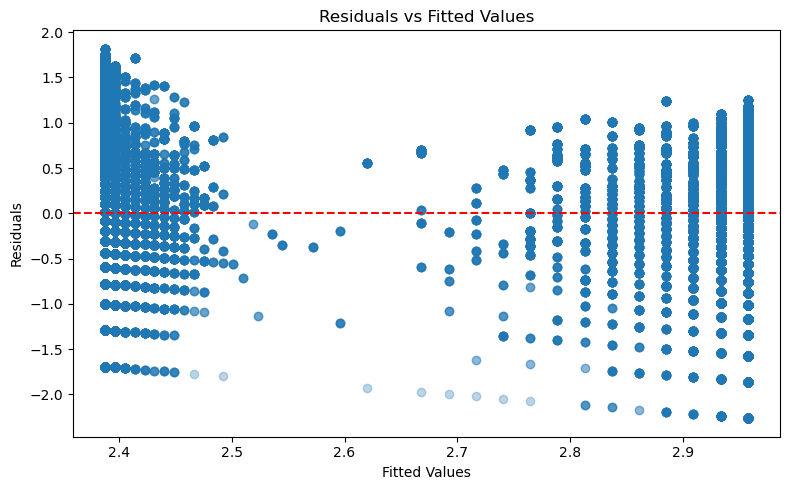

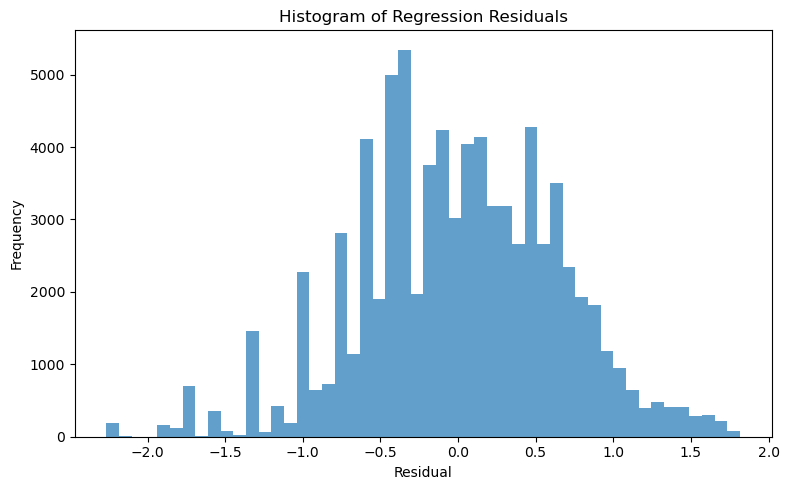

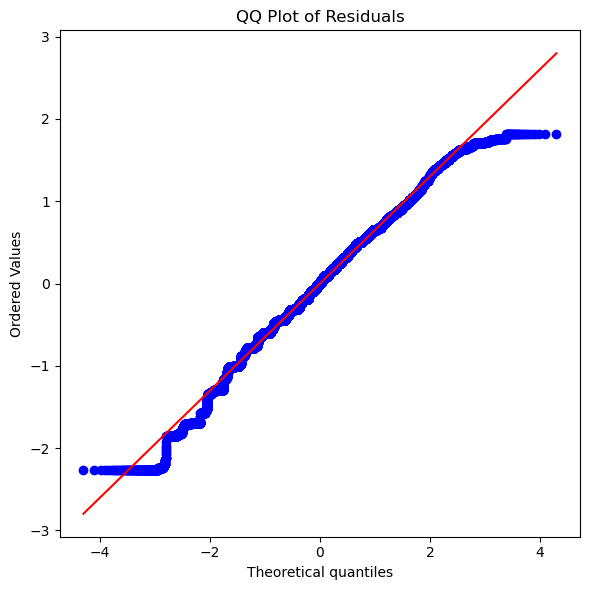

In [7]:
# Extract fitted values and residuals
fitted_vals = model_h1.fittedvalues
residuals = model_h1.resid

# 1. Residuals vs Fitted Plot
plt.figure(figsize=(8,5))
plt.scatter(fitted_vals, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.tight_layout()
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Regression Residuals")
plt.tight_layout()
plt.show()

# 3. QQ Plot (Normality Check)
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()


## Question 2: <a name="Q2"></a>

**<u>How do emotionally charged keywords in video titles (e.g., `emotional_keywords`, `search_keywords`, `trend_2017_2018_keywords`) influence trending duration, and does the strength of this effect differ between the United States and the United Kingdom?</u>**

**Hypothesis:** Emotionally charged categories of keywords in video titles (e.g., `emotional_keywords`, `search_keywords`, and `trend_2017_2018_keywords`) are positively associated with trending duration, and the strength of this association differs across countries. 

#### Note:
- To learn more about what `emotional_keywords`, `search_keywords`, `trend_2017_2018_keywords` mean, please refer back to [Key Terms and Data Sources](#key)
- When a video has multiple catergory keywards, it is counted multiple times. For instance, if the title of a vidoe has both emotional and search keywords, then both of the columns will have value 1 for that.

In this section, several keyword-based features are created to capture different thematic categories of YouTube video titles and to examine whether their effects differ across regions. 

Three keyword lists representing emotional language, search-intent language, and culturally relevant trending topics from 2017–2018 were created in order to classify each video title into meaningful content types. 

A helper function `has_keywords()` was created, which checks whether a title contains any keyword from a given list and returns a binary indicator; applying this function produced three new variables (`emotional_keywords`, `search_keywords`, and `trend_2017_2018_keywords`) that identify whether a video title contains each keyword type. 

Next, interaction terms were created by multiplying each keyword indicator with the previously defined country_dummy (1 for UK, 0 for US). This helps to test whether the relationship between keyword usage and trending duration differs between the two.

The prevalence of each keyword category was also printed out to provide context on how common these features are within the dataset. This feature engineering step prepares the dataset for regression models that explore how title language and cultural context jointly influence trending outcomes.

In [8]:
# Define keyword categories
emotional_keywords = [
    'love', 'hate', 'angry', 'happy', 'sad', 'amazing', 'terrible', 
    'shocking', 'unbelievable', 'incredible', 'awesome', 'horrible',
    'beautiful', 'ugly', 'best', 'worst', 'epic', 'fail', 'win',
    'crazy', 'insane', 'heartbreaking', 'hilarious', 'emotional'
]

search_keywords = [
    'how to', 'tutorial', 'guide', 'review', 'vs', 'comparison',
    'explained', 'learn', 'tips', 'tricks', 'hacks', 'diy',
    'what is', 'why', 'when', 'where', 'who', 'unboxing'
]

# 2017-2018 trending topics
trend_2017_2018_keywords = [
    'trump', 'fortnite', 'fidget spinner', 'bitcoin', 'cryptocurrency',
    'iphone x', 'logan paul', 'jake paul', 'pewdiepie', 'hurricane',
    'eclipse', 'royal wedding', 'world cup', 'black panther',
    'avengers', 'despacito', 'gangnam style', 'challenge', 'prank',
    'mukbang', 'asmr', 'vlog', 'rewind', 'ed sheeran'
]

# Create binary indicators
# TODO: what happen if a video has both emotional and search, ACKNOWLEDGE IT!
def has_keywords(title, keywords):
    """Check if title contains any keyword from the list"""
    title_lower = str(title).lower()
    return int(any(keyword.lower() in title_lower for keyword in keywords))

df_combined['emotional_keywords'] = df_combined['title'].apply(
    lambda x: has_keywords(x, emotional_keywords)
)
df_combined['search_keywords'] = df_combined['title'].apply(
    lambda x: has_keywords(x, search_keywords)
)
df_combined['trend_2017_2018_keywords'] = df_combined['title'].apply(
    lambda x: has_keywords(x, trend_2017_2018_keywords)
)

# Create interaction terms
df_combined['emotional_x_country'] = df_combined['emotional_keywords'] * df_combined['country_dummy']
df_combined['search_x_country'] = df_combined['search_keywords'] * df_combined['country_dummy']
df_combined['trend_x_country'] = df_combined['trend_2017_2018_keywords'] * df_combined['country_dummy']

# Print prevalence
print("\nKeyword Prevalence:")
print(f"Emotional keywords: {df_combined['emotional_keywords'].mean()*100:.2f}% of videos")
print(f"Search keywords: {df_combined['search_keywords'].mean()*100:.2f}% of videos")
print(f"2017-2018 trend keywords: {df_combined['trend_2017_2018_keywords'].mean()*100:.2f}% of videos")


Keyword Prevalence:
Emotional keywords: 7.56% of videos
Search keywords: 10.31% of videos
2017-2018 trend keywords: 6.53% of videos


#### Linear Regression <a name="lin02"></a>
The below regression model explains approximately 14.2% of the variance in trending duration (R² = 0.142), indicating that linguistic and topical keywords help explain performance on the trending list, though many other factors also influence how long a video stays trending. The results reveal several meaningful patterns:

1. Emotional Keywords — Negative Association

The coefficient for emotional keywords is negative and significant (β = –0.0732, p = 0.003), indicating that videos with emotional language in their titles (e.g., shocking, amazing, heartbreaking) tend to remain trending for fewer days. This runs counter to the common assumption that emotional language boosts virality. One possible explanation is that emotional phrasing may be perceived as clickbait, reducing long-term engagement and causing videos to drop off the trending list more quickly.

2. Search/Instructional Keywords — Strong Negative Effect

Search-intent keywords such as how to, tips, and review also show a significant negative association (β = –0.2110, p < 0.001). These videos may attract consistent search traffic but lack the viral, share-driven engagement that sustains trending performance. As a result, they appear briefly on the trending page but do not stay there for long.

3. Trending-Topic Keywords (2017–2018) — Positive Effect

In contrast, videos referencing major cultural events from 2017–2018 (Fortnite, Bitcoin, Logan Paul, Black Panther, Despacito) have a significant positive effect on trending duration (β = +0.1524, p < 0.001). This suggests that videos tied to global or large-scale cultural moments benefit from broader audience interest and remain trending longer.

4. Country Effect — UK Videos Trend Longer

The country dummy (1 = UK) is highly significant (β = 1.0902, p < 0.001), indicating that UK videos stay trending longer than US videos, regardless of keyword type. This may reflect differences in audience behavior, platform engagement patterns, or how content surfaces on the UK trending page.

5. Interaction Effects — Cultural Differences in Keyword Impact

- Interaction terms reveal whether the effects of different keyword types vary between the US and UK:
- Emotional × Country: Not significant (β = –0.0148, p = 0.679) — emotional keywords behave similarly across both regions.
- Search × Country: Not statistically significant (β = –0.0525, p = 0.100) — slight differences exist but cannot be confidently confirmed.
- Trend Keywords × Country: Significant interaction (β = –0.3281, p < 0.001) — the positive effect of trend-topic keywords is weaker in the UK than in the US.

This final result indicates a meaningful cultural difference: while trend-topic keywords boost trending duration overall, US audiences respond more strongly to culturally relevant trending topics compared to UK audiences.

In [9]:
# Prepare data for regression
h2_data = df_combined[[
    'total_trending_days', 'emotional_keywords', 'search_keywords',
    'trend_2017_2018_keywords', 'country_dummy', 'emotional_x_country',
    'search_x_country', 'trend_x_country'
]].dropna()

# Fit the model
X_h2 = h2_data[[
    'emotional_keywords', 'search_keywords', 'trend_2017_2018_keywords',
    'country_dummy', 'emotional_x_country', 'search_x_country', 'trend_x_country'
]]
X_h2 = sm.add_constant(X_h2)
y_h2 = np.sqrt(h2_data['total_trending_days'])

model_h2 = sm.OLS(y_h2, X_h2).fit()

print("\n" + "="*80)
print("Hypothesis 2 Regression Results:")
print("="*80)
print(model_h2.summary())


Hypothesis 2 Regression Results:
                             OLS Regression Results                            
Dep. Variable:     total_trending_days   R-squared:                       0.142
Model:                             OLS   Adj. R-squared:                  0.142
Method:                  Least Squares   F-statistic:                     1894.
Date:                 Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                         23:08:06   Log-Likelihood:            -1.3629e+05
No. Observations:                79865   AIC:                         2.726e+05
Df Residuals:                    79857   BIC:                         2.727e+05
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [10]:
# Interpretation
print("\n" + "="*80)
print("HYPOTHESIS 2 INTERPRETATION:")
print("="*80)
print(f"Intercept (β₀): {model_h2.params['const']:.4f}")
print(f"Emotional Keywords (β₁): {model_h2.params['emotional_keywords']:.4f} (p={model_h2.pvalues['emotional_keywords']:.4f})")
print(f"Search Keywords (β₂): {model_h2.params['search_keywords']:.4f} (p={model_h2.pvalues['search_keywords']:.4f})")
print(f"Trend Keywords (β₃): {model_h2.params['trend_2017_2018_keywords']:.4f} (p={model_h2.pvalues['trend_2017_2018_keywords']:.4f})")
print(f"Country Effect (β₄): {model_h2.params['country_dummy']:.4f}")

print("\nInteraction Effects:")
print(f"Emotional × Country (β₅): {model_h2.params['emotional_x_country']:.4f} (p={model_h2.pvalues['emotional_x_country']:.4f})")
print(f"Search × Country (β₆): {model_h2.params['search_x_country']:.4f} (p={model_h2.pvalues['search_x_country']:.4f})")
print(f"Trend × Country (β₇): {model_h2.params['trend_x_country']:.4f} (p={model_h2.pvalues['trend_x_country']:.4f})")

# Test positive associations
print("\n" + "="*80)
print("HYPOTHESIS TESTS:")
print("="*80)

for param, name in [('emotional_keywords', 'Emotional'), 
                    ('search_keywords', 'Search'),
                    ('trend_2017_2018_keywords', 'Trend')]:
    coef = model_h2.params[param]
    pval = model_h2.pvalues[param]
    if coef > 0 and pval < 0.05:
        print(f"✓ {name} keywords POSITIVELY associated with trending duration (β={coef:.4f}, p={pval:.4f})")
    elif coef > 0:
        print(f"○ {name} keywords positive but not significant (β={coef:.4f}, p={pval:.4f})")
    else:
        print(f"✗ {name} keywords NOT positively associated (β={coef:.4f}, p={pval:.4f})")


HYPOTHESIS 2 INTERPRETATION:
Intercept (β₀): 3.3680
Emotional Keywords (β₁): -0.0732 (p=0.0030)
Search Keywords (β₂): -0.2110 (p=0.0000)
Trend Keywords (β₃): 0.1524 (p=0.0000)
Country Effect (β₄): 1.0902

Interaction Effects:
Emotional × Country (β₅): -0.0148 (p=0.6792)
Search × Country (β₆): -0.0525 (p=0.1004)
Trend × Country (β₇): -0.3281 (p=0.0000)

HYPOTHESIS TESTS:
✗ Emotional keywords NOT positively associated (β=-0.0732, p=0.0030)
✗ Search keywords NOT positively associated (β=-0.2110, p=0.0000)
✓ Trend keywords POSITIVELY associated with trending duration (β=0.1524, p=0.0000)


#### Check Multilinearity <a name="multi02"></a>

The VIF results below indicate that multicollinearity is not a concern in our model, as all predictors—including interaction terms—show VIF values between 1.2 and 2.3, well below the commonly accepted threshold of 5. This suggests that the emotional, search, and trend keyword indicators each capture distinct aspects of title content without redundantly measuring the same construct. The interaction terms also show only moderate correlations with their corresponding main effects, meaning country-specific keyword patterns can be interpreted reliably without inflating standard errors. Additionally, the country dummy variable has a particularly low VIF (1.26), indicating that country differences are statistically separable from keyword usage patterns. Overall, these VIF results confirm that the regression model is stable, interpretable, and not distorted by multicollinearity.

In [11]:
# Reuse the X_h2 matrix (without the fitted model)
X_for_vif = X_h2.copy()

# Create a VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i)
                   for i in range(X_for_vif.shape[1])]
vif_data

,feature,VIF
0,const,2.509323
1,emotional_keywords,1.914422
2,search_keywords,1.642256
3,trend_2017_2018_keywords,2.137702
4,country_dummy,1.256220
5,emotional_x_country,1.994470
6,search_x_country,1.708659
7,trend_x_country,2.223262


#### Check Assumption <a name="check02"></a>

To assess how emotionally charged keywords influence trending duration—and whether these effects differ between the United States and the United Kingdom—the standard linear regression assumptions were reviewed using the residual, histogram, and Q–Q plots.

- Linearity: The residuals vs. fitted values plot shows several vertical bands of points. This pattern occurs because trending duration (even after log transformation) takes on a limited set of discrete values, and the keyword variables—especially emotional, search-based, and trending-term indicators—are also dummy coded. With many observations falling into the same keyword combinations, the fitted values naturally cluster into distinct groups. Despite this segmentation, the points remain generally centered around the horizontal reference line, suggesting that the linear form provides a reasonable first approximation for capturing keyword effects.

- Constant Variance: The spread of residuals varies slightly across different fitted-value bands. This is expected with large datasets where many observations share similar title structures, keyword counts, or regional characteristics. The variability likely reflects natural differences in video performance rather than structural issues in the modeling process. Given the scale of the dataset, this level of variability is not unusual and the assumption of constant variance is reasonable for exploratory and comparative purposes.

- Normality of Residuals: The histogram and Q–Q plot show some departure from perfect normality, particularly in the tails. This is expected in large social-media datasets, where video performance is influenced by many external factors such as upload timing, creator popularity, audience behavior, and algorithmic dynamics. These influences create natural skewness and heavy tails that commonly appear in models predicting engagement outcomes. The residual distribution remains suitable for evaluating general patterns and effect directionality, especially with high sample sizes.

The diagnostics indicate that the linear regression model is generally appropriate for exploring how emotional keywords relate to trending duration and how this relationship differs between the U.S. and U.K. The effects identified in the model can be considered meaningful, particularly given the large volume of data. However, due to natural variability in trending behavior and the discrete structure of both keyword categories and engagement outcomes, the results should be interpreted with caution. The observed effects are significant, but they likely capture only part of a more complex set of factors influencing YouTube trending performance.

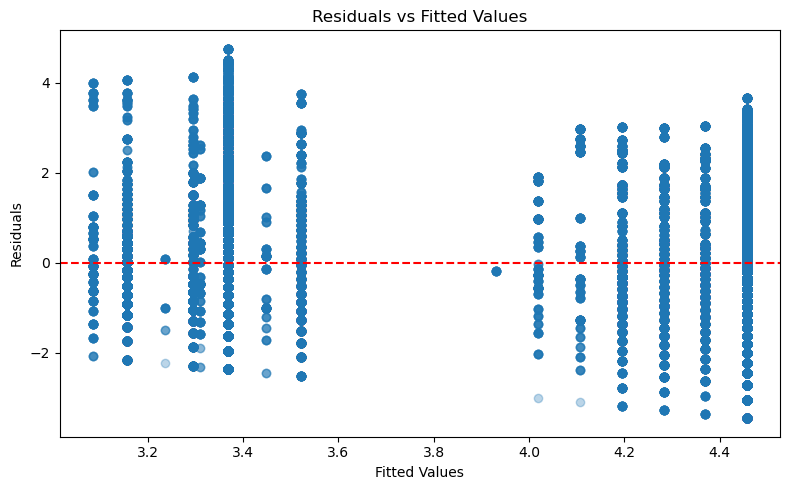

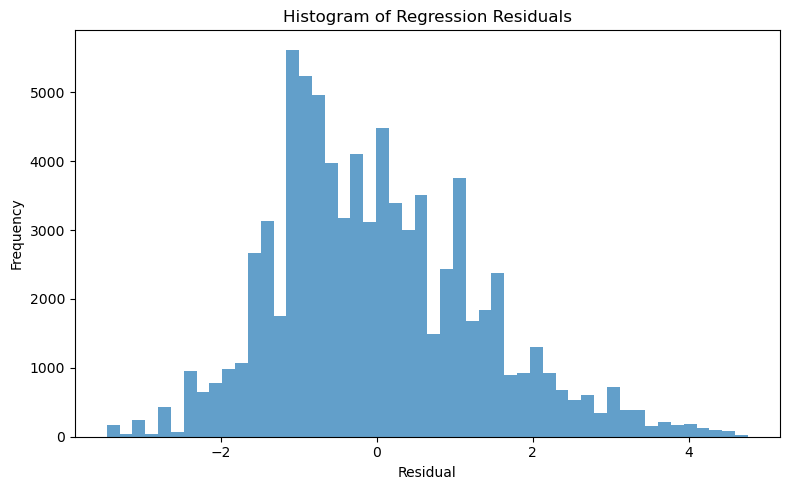

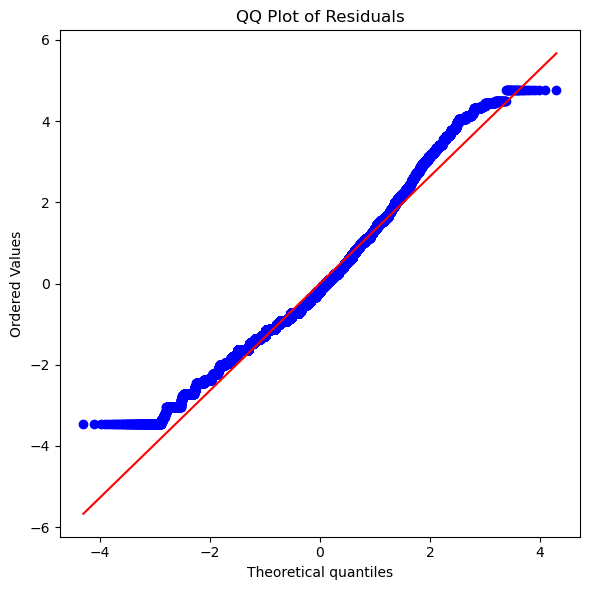

In [12]:
fitted_vals = model_h2.fittedvalues
residuals = model_h2.resid

# ------------------------------------------------------------
# 1. Residuals vs Fitted Plot
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.scatter(fitted_vals, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 2. Histogram of Residuals
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Regression Residuals")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 3. QQ Plot (Normality Check)
# ------------------------------------------------------------
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()

## Limitations <a name="limitation"></a>
_______
This dataset represents only a snapshot of YouTube’s trending videos during 2017–2018, rather than a complete record of all videos or long-term popularity trends. Videos that never trended or trended outside this period are excluded, which may bias insights toward more viral, mainstream, or sensational content. Because only trending videos are included, we cannot directly compare the characteristics of popular versus non-popular videos, which limits our ability to determine what differentiates trending from non-trending content.

Because the data relies on the YouTube Data API, missing entries may occur if API requests failed or limits were reached. This could result in incomplete coverage for certain days or regions, leading to uneven temporal or geographic representation.

The dataset includes trending data for only nine countries (e.g., the United States, United Kingdom, Japan, Korea, Mexico, Russia, Canada), so trends from other regions are not captured. Additionally, local differences in YouTube’s algorithms, cultural preferences, and platform usage can affect what becomes trending. For example:
- Cultural preferences: Audiences in the UK may prefer humor or commentary-style content, while US audiences may engage more with challenge videos or celebrity-focused content.
- Platform usage: In some countries, shorter attention spans may influence which videos trend, whereas in others, longer-form content or specific posting times may be more influential.

Additionally, because YouTube trending content is influenced by a wide range of external and highly unpredictable factors—such as rapid shifts in public attention, cross-platform virality, creator reputation and follower base, and even real-world events—it becomes difficult to isolate the specific variables within our dataset that directly drive a video to trend. Many influential factors are either unobservable, not captured in the dataset, or inherently unstable over time, limiting our ability to establish strong causal relationships based solely on the available information.

Finally, because the dataset is from 2017–2018, the analysis reflects a historical period of YouTube and may not generalize to today. Changes in technology, platform features (e.g., Shorts, algorithm updates), and global content consumption habits mean that insights drawn from this dataset may not apply to current trends. 

Impact: These limitations affect the representativeness, fairness, and temporal relevance of results. Findings may overemphasize trends from certain countries, content types, or time periods, and may not fully capture the diversity of global viewing behaviors or current platform dynamics.


## Conclusions <a name="conclusion"></a>
_______
Our analysis reveals that YouTube trending dynamics differ meaningfully across countries, with capitalization patterns and keyword categories exerting distinct influences on trending duration in the US and the UK. For Hypothesis 1, we find that capitalization has a small but statistically significant positive effect on trending duration overall. However, this relationship weakens in the UK, as evidenced by the negative and significant interaction term. This suggests that American audiences are more responsive to visually emphasized, attention-grabbing titles than British audiences, aligning with broader cultural communication norms that favor more direct and high-impact presentation styles in the US.

For Hypothesis 2, emotional and informational (search-type) titles unexpectedly predict shorter trending durations, while videos referencing major cultural events or viral topics from 2017–2018 tend to stay trending longer. Importantly, nearly all cross-country interaction effects are small and nonsignificant, with the exception of trend-related keywords, which perform worse in the UK. This indicates that while cultural topics help videos remain trending, this effect is again stronger in the U.S.

Taken together, the findings suggest that American audiences reward more visually emphasized titles and respond more strongly to major cultural events, whereas British viewers exhibit more muted reactions to these cues. At the same time, the relatively low R² values and the natural complexity of YouTube’s recommendation ecosystem highlight that trending behavior is influenced by many factors beyond title formatting and keyword content. While our models capture meaningful, interpretable patterns, they represent only part of a much broader set of forces shaping online virality.

## References <a name="reference"></a>
_______

Borghol, Y., Ardon, S., Carlsson, N., Eager, D., & Mahanti, A. (2013). The untold story of the clones: Content-agnostic factors that impact YouTube video popularity. arXiv. https://arxiv.org/abs/1311.6526 arXiv+1


Cunningham, S., & Craig, D. (2017). Being “really real” on YouTube: Authenticity, community and brand culture in social media entertainment. Media International Australia, 164(1), 71–81. https://doi.org/10.1177/1329878X17709098

Singh, S. (2025, November 12). How many people use YouTube in 2025? DemandSage. https://www.demandsage.com/youtube-stats/ DemandSage


SQ Magazine. (2025, August 12). Social media algorithm impact statistics. SQ Magazine. https://sqmagazine.co.uk/social-media-algorithm-impact-statistics/

IgniteFlow. Crafting high-converting titles with psychology_. Retrieved November 19, 2025, from https://igniteflow.com/crafting-high-converting-titles-with-psychology/

Google Trends. Year in Search 2017_. Retrieved November 19, 2025, from https://trends.withgoogle.com/year-in-search/2017/
